<a href="https://colab.research.google.com/github/cshooon/Data_Analysis/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from itertools import chain, combinations
import statsmodels.api as sm

pd.set_option('display.precision',2) #number precision for pandas
pd.set_option('display.max_rows',12)
pd.set_option('display.max_columns',12)
pd.set_option('display.float_format','{:20,.2f}'.format) #get rid of scientific notation

plt.style.use('seaborn') #pretty matplotlib plots

<ipython-input-2-20851bee1d83>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #pretty matplotlib plots


In [ ]:
hitters=pd.read_csv('/content/drive/MyDrive/RecoSys/Data/Hitters.csv',index_col=0).dropna()
hitters.index.name='Player'

hitters=hitters.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]]#push salary at the end
hitters['League']=pd.get_dummies(hitters['League']).iloc[:,0]
hitters['Division']=pd.get_dummies(hitters['Division']).iloc[:,0]
hitters['NewLeague']=pd.get_dummies(hitters['NewLeague']).iloc[:,0]

x=hitters.iloc[:,0:19]
y=hitters.iloc[:,19]

In [ ]:
hitters=pd.read_csv('/content/drive/MyDrive/RecoSys/Data/Hitters.csv',index_col=0).dropna()
hitters.index.name='Player'

hitters=hitters.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]] #push salary at the end
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,Division,PutOuts,Assists,Errors,NewLeague,Salary
Player,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,...,W,632,43,10,N,475.00
-Alvin Davis,479,130,18,66,72,76,...,W,880,82,14,A,480.00
-Andre Dawson,496,141,20,65,78,37,...,E,200,11,3,N,500.00
-Andres Galarraga,321,87,10,39,42,30,...,E,805,40,4,N,91.50
-Alfredo Griffin,594,169,4,74,51,35,...,W,282,421,25,A,750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Willie McGee,497,127,7,65,48,37,...,E,325,9,3,N,700.00
-Willie Randolph,492,136,5,76,50,94,...,E,313,381,20,A,875.00
-Wayne Tolleson,475,126,3,61,43,52,...,W,37,113,7,A,385.00


In [ ]:
pd.get_dummies(hitters['NewLeague'])

,A,N
Player,,
-Alan Ashby,0,1
-Alvin Davis,1,0
-Andre Dawson,0,1
-Andres Galarraga,0,1
-Alfredo Griffin,1,0
...,...,...
-Willie McGee,0,1
-Willie Randolph,1,0
-Wayne Tolleson,1,0


In [ ]:
# #takes a f**in' long time

# k_features=1

# sub=[]
# reg=[]
# kft=[]

# n_features=x.shape[1]

# for k_features in range(1,20):
#     subsets=chain(combinations(range(n_features),k_features))

#     best_score=np.inf

#     for subset in subsets:
#         lin_reg=sm.OLS(y,sm.add_constant(x.iloc[:,list(subset)])).fit()
#         score=lin_reg.ssr
#         if score < best_score:
#             best_score, best_subset=score, list(subset)
#             best_reg=lin_reg


#     sub.append(best_subset)
#     reg.append(best_reg)
#     kft.append(k_features)

# results=pd.DataFrame({'kft':kft,'sub':sub,'reg':reg},columns=['sub','reg','kft']).set_index('kft')

In [ ]:
results=pd.read_pickle('/content/drive/MyDrive/RecoSys/Data/results_651')

<Axes: title={'center': 'BIC'}, xlabel='kft'>

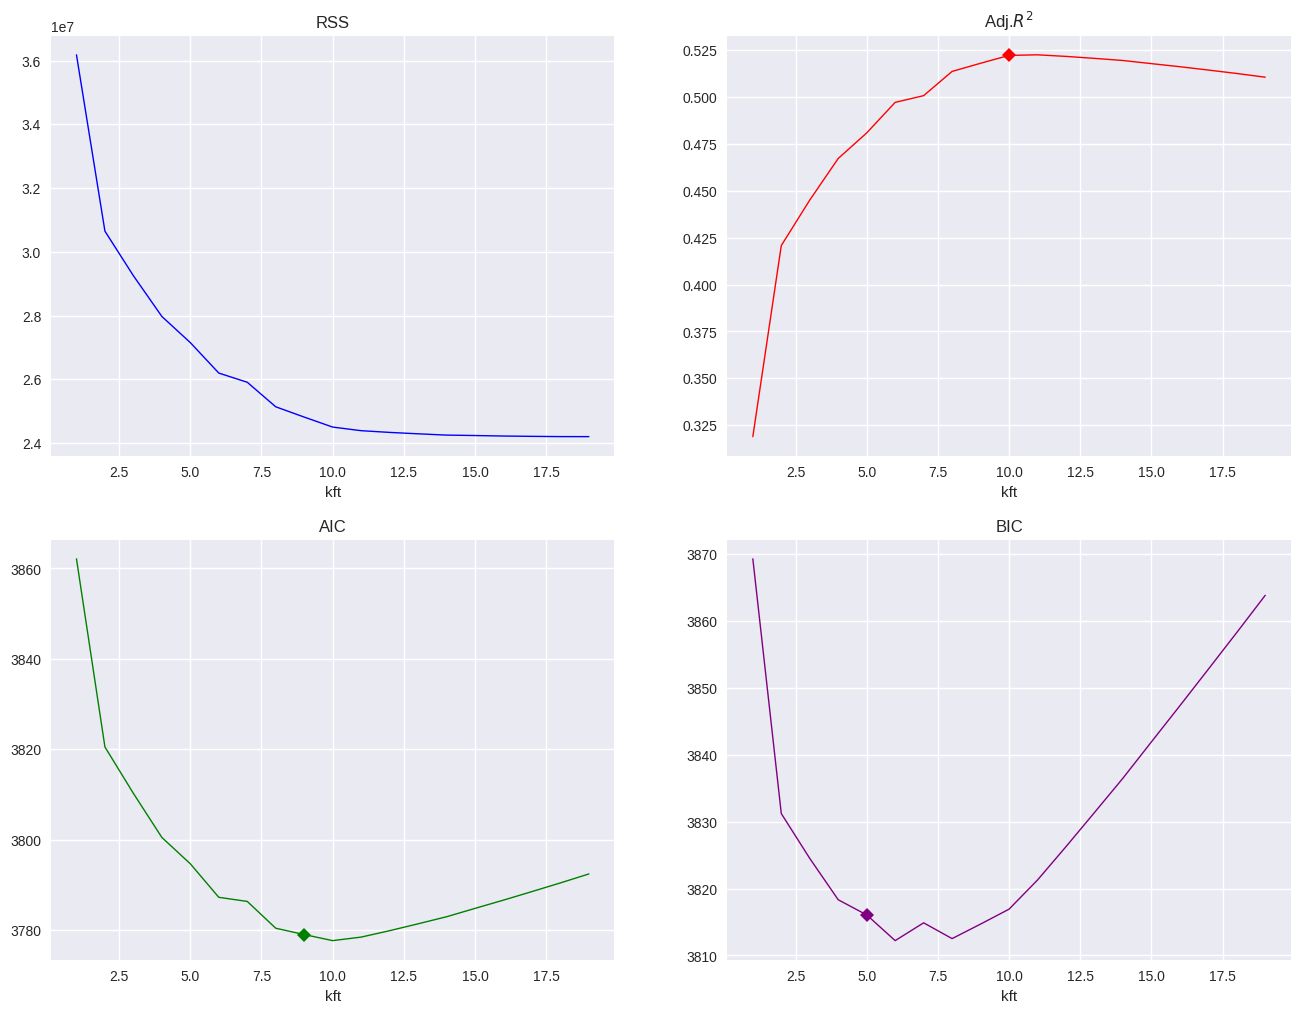

In [ ]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
results.rss.plot(title='RSS',lw=1,color='blue')

plt.subplot(2,2,2)
max_r2a=results.r2a.argmax()-1
results.r2a.plot(title='Adj.$R^2$',markevery=[max_r2a],marker='D',lw=1,color='red')

plt.subplot(2,2,3)
min_aic=results.aic.argmin()-1
results.aic.plot(title='AIC',markevery=[min_aic],marker='D',lw=1,color='green')

plt.subplot(2,2,4)
min_bic=results.bic.argmin()-1
results.bic.plot(title='BIC',markevery=[min_bic],marker='D',lw=1,color='purple')

In [ ]:
def processSubset(feature_set):
    #Fit model on feature_Set and calculate RSS
    model=sm.OLS(y,x[list(feature_set)])
    regr=model.fit()
    RSS=regr.ssr
    return {'model':regr,'RSS':RSS}

In [ ]:
def forward(predictors):

    #Pul out predictors we still need to process
    remaining_predictors=[p for p in x.columns if p not in predictors]

    results=[]

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    #Wrap everything up in a nice dataframe
    models=pd.DataFrame(results)

    #Choose the model with the Lowest RSS
    best_model=models.loc[models['RSS'].argmin()]

    #Return the best model,along with some other useful information about the model
    return best_model

def backward(predictors):

    results=[]

    for combo in combinations(predictors,len(predictors)-1):
        results.append(processSubset(combo))

    #Wrap everything up in a nice dataframe
    models=pd.DataFrame(results)

    #Choose the model with the Lowest RSS
    best_model=models.loc[models['RSS'].argmin()]

    return best_model

In [ ]:
models2=pd.DataFrame(columns=['RSS','model'])

predictors=[]

for i in range(1,len(x.columns)+1):
    models2.loc[i]=forward(predictors)
    predictors=models2.loc[i]['model'].model.exog_names

bic_f=[]

for m in models2.model:
    bic_f.append(m.bic)

np.array(bic_f).argmin()

5

In [ ]:
predictors,bic_f

(['Hits',
  'CRBI',
  'PutOuts',
  'AtBat',
  'Division',
  'Walks',
  'CWalks',
  'CRuns',
  'CAtBat',
  'Assists',
  'Runs',
  'League',
  'HmRun',
  'Errors',
  'NewLeague',
  'RBI',
  'CHits',
  'Years',
  'CHmRun'],
 [3910.437405792022,
  3826.372838539718,
  3820.626997734044,
  3815.4605878697303,
  3810.7331322124824,
  3806.8883425646886,
  3809.859789827498,
  3807.1870192596657,
  3809.3387521975437,
  3811.923580691154,
  3816.5713995697747,
  3821.5191822804245,
  3826.8028102714034,
  3832.1077814957293,
  3837.456294954363,
  3842.8214798303275,
  3848.2258352295075,
  3853.720486189592,
  3859.2816820271046])

In [ ]:
models3=pd.DataFrame(columns=['RSS','model'],index=range(1,len(x.columns)))

predictors=x.columns

while(len(predictors)>1):
    models3.loc[len(predictors)-1]=backward(predictors)
    predictors=models3.loc[len(predictors)-1]['model'].model.exog_names

bic_b=[]

for m in models3.model:
    bic_b.append(m.bic)

np.array(bic_b).argmin()

7

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=3)

In [ ]:
def processSubset(feature_set,x_train,y_train,x_test,y_test):
    #Fit model on feature_Set and calculate RSS
    model=sm.OLS(y_train,x_train[list(feature_set)])
    regr=model.fit()
    RSS=((regr.predict(x_test[list(feature_set)])-y_test)**2).sum()
    return {'model':regr,'RSS':RSS}

In [ ]:
def forward(predictors,x_train,y_train,x_test,y_test):

    #Pull out predictors we still need to process
    remaining_predictors=[p for p in x_train.columns if p not in predictors]

    results=[]

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p],x_train,y_train,x_test,y_test))

        #Wrap everything up in a nice dataframe
        models=pd.DataFrame(results)

        #Choose the model with the highest RSS
        best_model=models.loc[models['RSS'].argmin()]

        #Return the best model, along with some other useful information about the model
        return best_model


In [ ]:
models_train=pd.DataFrame(columns=['RSS','model'])

predictors=[]

for i in range(1,len(x.columns)+1):
    models_train.loc[i]=forward(predictors,x_train,y_train,x_test,y_test)
    predictors=models_train.loc[i]['model'].model.exog_names

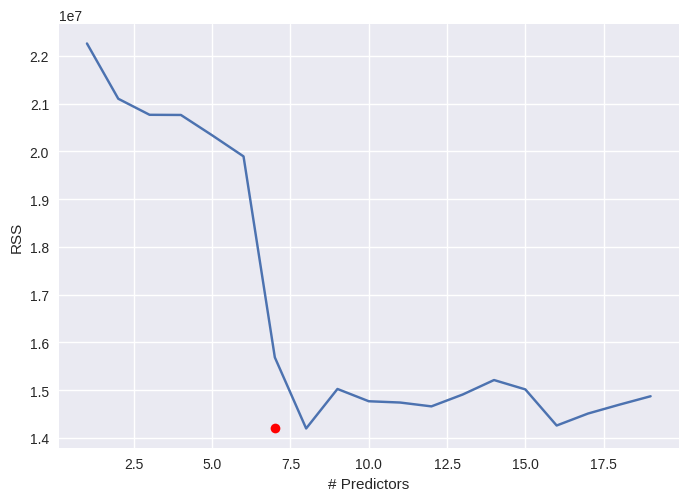

In [ ]:
plt.plot(models_train['RSS'])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_train['RSS'].values.argmin(),models_train['RSS'].min(),'or')

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV,Lasso,LassoCV
from sklearn.preprocessing import scale

grid=10**np.linspace(3,-2,100)

ridge_model=Ridge()
coefs=[]

for a in grid:
    ridge_model.set_params(alpha=a)
    ridge_model.fit(scale(x), y)
    coefs.append(ridge_model.coef_)

In [ ]:
grid[49]

3.351602650938841

In [ ]:
pd.Series(coefs[49],index=x.columns)

AtBat                    -218.22
Hits                      233.85
HmRun                       2.23
Runs                       -1.15
RBI                         4.49
                    ...         
Division                   61.70
PutOuts                    77.64
Assists                    39.48
Errors                    -25.09
NewLeague                  13.62
Length: 19, dtype: float64

Text(0, 0.5, 'weights')

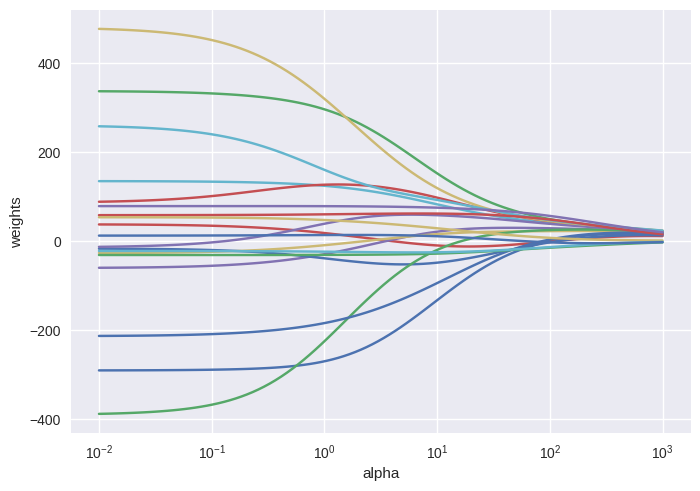

In [ ]:
ax=plt.gca()
ax.plot(grid,coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)

#'good' ridge model
ridge2=Ridge(alpha=4)
ridge2_fit=ridge2.fit(x_train,y_train)
y_pred2=ridge2.predict(x_test)

print(pd.Series(ridge2_fit.coef_,index=x.columns))
print('MSE:',mean_squared_error(y_test,y_pred2))

AtBat                      -1.85
Hits                        4.36
HmRun                      -5.28
Runs                       -0.17
RBI                         4.25
                    ...         
Division                  100.61
PutOuts                     0.42
Assists                     0.45
Errors                     -5.51
NewLeague                  21.15
Length: 19, dtype: float64
MSE: 115325.04539923291


In [ ]:
#very high lambda
ridge3=Ridge(alpha=1e10)
ridge3_fit=ridge3.fit(x_train,y_train)
y_pred3=ridge3.predict(x_test)

print(pd.Series(ridge3_fit.coef_,index=x.columns))
print('MSE:',mean_squared_error(y_test,y_pred3))

AtBat                       0.00
Hits                        0.00
HmRun                       0.00
Runs                        0.00
RBI                         0.00
                    ...         
Division                    0.00
PutOuts                     0.00
Assists                    -0.00
Errors                      0.00
NewLeague                   0.00
Length: 19, dtype: float64
MSE: 165016.14024085485


In [ ]:
#lambda=0 ->OLS

ridge4=Ridge(alpha=0)
ridge4_fit=ridge4.fit(x_train,y_train)
y_pred4=ridge4.predict(x_test)

print(pd.Series(ridge4_fit.coef_,index=x.columns))
print('MSE:',mean_squared_error(y_test,y_pred4))

AtBat                      -1.82
Hits                        4.26
HmRun                      -4.77
Runs                       -0.04
RBI                         3.98
                    ...         
Division                  113.74
PutOuts                     0.42
Assists                     0.46
Errors                     -6.02
NewLeague                  81.93
Length: 19, dtype: float64
MSE: 116690.4685666203


In [ ]:
#cross validated ridge
ridge_cv=RidgeCV(alphas=grid,scoring='neg_mean_squared_error')
ridge_cv.fit(x_train,y_train)
ridge_cv.alpha_

1000.0

In [ ]:
#cv_lambda
ridge5=Ridge(alpha=ridge_cv.alpha_)
ridge5_fit=ridge5.fit(x_train,y_train)
y_pred5=ridge5.predict(x_test)

print(pd.Series(ridge5_fit.coef_,index=x.columns))
print('MSE:',mean_squared_error(y_test,y_pred5))

AtBat                      -2.02
Hits                        4.54
HmRun                      -3.61
Runs                       -0.46
RBI                         4.54
                    ...         
Division                    3.16
PutOuts                     0.45
Assists                     0.48
Errors                     -3.39
NewLeague                  -0.67
Length: 19, dtype: float64
MSE: 117960.83612305028


In [ ]:
from sklearn.preprocessing import scale

grid=10**np.linspace(3,-2,100)

lasso_model=Lasso(max_iter=10000) #max_iter=10000 for removing ConvergenceWarning
coefs=[]

for a in grid:
    lasso_model.set_params(alpha=a)
    lasso_model.fit(scale(x_train),y_train)
    coefs.append(lasso_model.coef_)

Text(0, 0.5, 'weights')

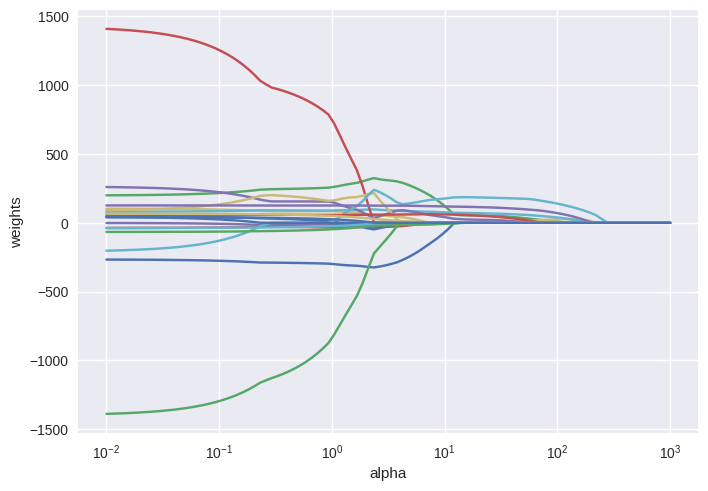

In [ ]:
ax=plt.gca()
ax.plot(grid,coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lasso_cv=LassoCV(alphas=grid,max_iter=100000,cv=10)
lasso_cv.fit(x_train,y_train)
lasso_cv.alpha_

705.4802310718645

In [ ]:
lasso2=Lasso(alpha=lasso_cv.alpha_,max_iter=10000)
lasso2_fit=lasso2.fit(x_train,y_train)
y_pred2=lasso2_fit.predict(x_test)

print(pd.Series(lasso2_fit.coef_,index=x.columns))
print('MSE:',mean_squared_error(y_test,y_pred2))

AtBat                       0.00
Hits                        0.62
HmRun                       0.00
Runs                        0.00
RBI                         0.00
                    ...         
Division                    0.00
PutOuts                     0.45
Assists                     0.11
Errors                     -0.00
NewLeague                  -0.00
Length: 19, dtype: float64
MSE: 118915.68363904647


In [ ]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression,PLSSVD
from sklearn.metrics import mean_squared_error

In [ ]:
pca=PCA()
x_pca=pca.fit_transform(scale(x))
pd.DataFrame(x_pca)

,0,1,2,3,4,5,...,13,14,15,16,17,18
0,-0.01,1.87,1.27,-0.94,1.11,1.21,...,0.39,0.06,0.14,0.08,0.04,-0.02
1,0.41,-2.43,-0.91,-0.26,1.23,1.83,...,-0.02,0.07,0.16,0.04,0.01,-0.00
2,3.47,0.83,0.56,-1.62,-0.86,-1.03,...,-0.38,0.23,0.01,-0.22,0.04,-0.07
3,-2.56,-0.23,0.52,-2.18,-0.82,1.49,...,0.03,0.04,0.05,-0.04,0.01,-0.01
4,1.03,-1.57,1.33,3.49,0.98,0.51,...,-0.09,0.04,0.01,-0.05,0.13,-0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,-0.33,-0.17,0.78,-1.54,-1.04,-0.31,...,-0.16,0.23,-0.22,0.13,-0.06,-0.01
259,3.25,-0.54,1.21,2.75,-1.20,0.83,...,0.32,-0.14,0.01,-0.15,-0.05,-0.06
260,-1.09,-0.75,-0.94,1.07,0.71,-0.64,...,0.09,0.06,-0.10,-0.08,0.07,0.01
261,1.98,-2.18,-0.28,-0.22,-0.69,3.51,...,-0.23,0.02,-0.26,-0.01,0.02,-0.01


Text(0, 0.5, 'RMSE')

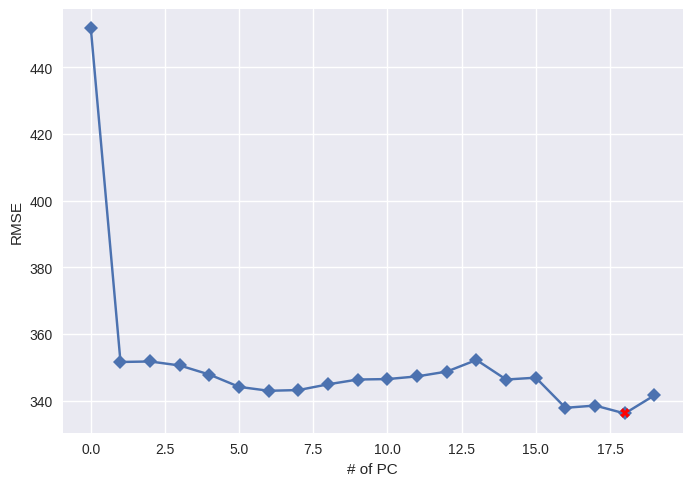

In [ ]:
#10-fold CV,with shuffle
n=len(x_pca)
k10=KFold(n_splits=10,shuffle=True,random_state=42)

lin_reg=LinearRegression()
rmse=[]

#MSE with only the intercept
score=-1*cross_val_score(lin_reg,np.ones((n,1)),y,cv=k10,scoring='neg_mean_squared_error').mean()
rmse.append(np.sqrt(score))

#MSe for the 19 principle components
for i in np.arange(1,20):
    score=-1*cross_val_score(lin_reg,x_pca[:,:i],y,cv=k10,scoring='neg_mean_squared_error').mean()
    rmse.append(np.sqrt(score))

min_rmse=np.array(rmse).argmin()

plt.plot(rmse,'-D')
plt.plot(rmse,markevery=[min_rmse],marker='X',lw=0,color='red')
plt.xlabel('# of PC')
plt.ylabel('RMSE')

([<matplotlib.axis.XTick at 0x7f79849a1b40>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

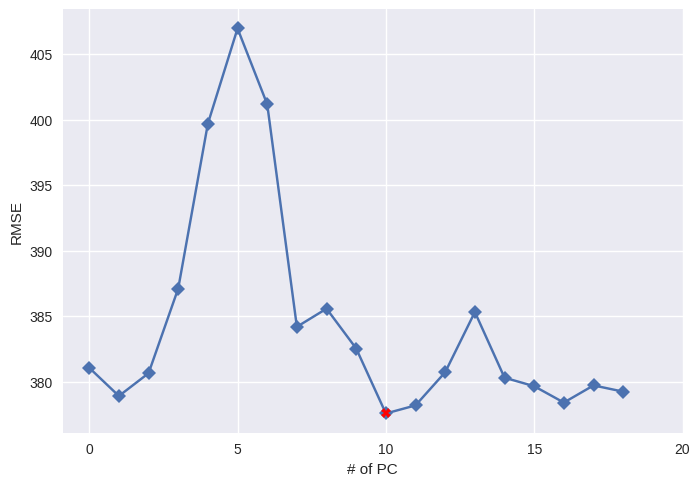

In [ ]:
#10-fold CV, with suffle
n=len(x_train)
k10=KFold(n_splits=10,shuffle=True,random_state=1)

rmse=[]

for i in np.arange(1,20):
    pls=PLSRegression(n_components=i)
    score=-1*cross_val_score(pls,scale(x_train),y_train,cv=k10,scoring='neg_mean_squared_error').mean()
    rmse.append(np.sqrt(score))

min_rmse=np.array(rmse).argmin()

plt.plot(rmse,'-D')
plt.plot(rmse,markevery=[min_rmse],marker='X',lw=0,color='red')
plt.xlabel('# of PC')
plt.ylabel('RMSE')
plt.xticks([0,5,10,15,20])